In [6]:
import keras
from keras import models
keras.__version__

'2.0.7'

In [2]:
from keras.preprocessing.text import Tokenizer
samples = ['The cat sat on the mat.', 'The dog ate my homework.']

# We create a tokenizer, configured to only take into account the top-1000 most common words
tokenizer = Tokenizer(num_words=1000)

# This builds the word index
tokenizer.fit_on_texts(samples)

# This turns strings into lists of integer indices.
sequences = tokenizer.texts_to_sequences(samples)

# You could also directly get the one-hot binary representations.
# Note that other vectorization modes than one-hot encoding are supported!
one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')

# This is how you can recover the word index that was computed
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9 unique tokens.


In [3]:
one_hot_results

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

Using word-embeddings 

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17448960/17464789 [============================>.] - ETA: 0s25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


### Training the model with Embedding and SimpleRNN layers

In [8]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 45s - loss: 0.6547 - acc: 0.6064 - val_loss: 0.5241 - val_acc: 0.7508
Epoch 2/10
20000/20000 [==============================] - 47s - loss: 0.4138 - acc: 0.8257 - val_loss: 0.3695 - val_acc: 0.8474
Epoch 3/10
20000/20000 [==============================] - 40s - loss: 0.2807 - acc: 0.8900 - va

In [9]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

### Training the model with Embedding and SimpleRNN layers

In [11]:
from keras.layers import LSTM

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 200s - loss: 0.5176 - acc: 0.7556 - val_loss: 0.3417 - val_acc: 0.8658
Epoch 2/10
20000/20000 [==============================] - 206s - loss: 0.2902 - acc: 0.8875 - val_loss: 0.3449 - val_acc: 0.8648
Epoch 3/10
20000/20000 [==============================] - 225s - loss: 0.2390 - acc: 0.9099 - val_loss: 0.4151 - val_acc: 0.8290
Epoch 4/10
20000/20000 [==============================] - 228s - loss: 0.1995 - acc: 0.9259 - val_loss: 0.4261 - val_acc: 0.8636
Epoch 5/10
20000/20000 [==============================] - 228s - loss: 0.1780 - acc: 0.9343 - val_loss: 0.4452 - val_acc: 0.8346
Epoch 6/10
20000/20000 [==============================] - 229s - loss: 0.1596 - acc: 0.9435 - val_loss: 0.2949 - val_acc: 0.8790
Epoch 7/10
20000/20000 [==============================] - 227s - loss: 0.1470 - acc: 0.9469 - val_loss: 0.3280 - val_acc: 0.8672
Epoch 8/10
20000/20000 [========================

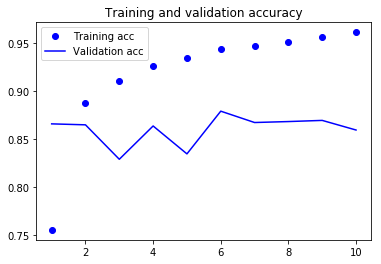

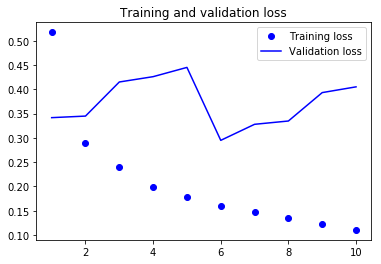

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Trying Different parameters

In [13]:
from keras.layers import Dense
from keras.layers import Embedding, SimpleRNN

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, 
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 65s - loss: 0.6027 - acc: 0.6488 - val_loss: 0.4018 - val_acc: 0.8310
Epoch 2/20
20000/20000 [==============================] - 65s - loss: 0.3541 - acc: 0.8534 - val_loss: 0.4390 - val_acc: 0.8172
Epoch 3/20
20000/20000 [==============================] - 64s - loss: 0.2689 - acc: 0.8941 - va

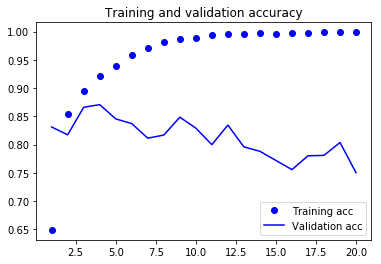

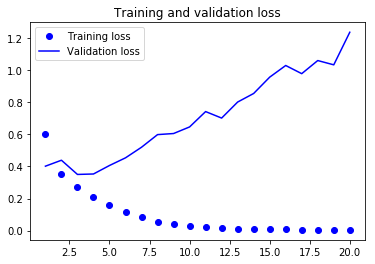

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Trying with LSTM and different parameters

In [15]:
from keras.layers import LSTM

model = models.Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=20,
                    batch_size=64,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 298s - loss: 0.4938 - acc: 0.7591 - val_loss: 0.4915 - val_acc: 0.7852
Epoch 2/20
20000/20000 [==============================] - 295s - loss: 0.2870 - acc: 0.8876 - val_loss: 0.4135 - val_acc: 0.8286
Epoch 3/20
20000/20000 [==============================] - 293s - loss: 0.2290 - acc: 0.9153 - val_loss: 0.3038 - val_acc: 0.8820
Epoch 4/20
20000/20000 [==============================] - 291s - loss: 0.1918 - acc: 0.9294 - val_loss: 0.3170 - val_acc: 0.8702
Epoch 5/20
20000/20000 [==============================] - 290s - loss: 0.1747 - acc: 0.9360 - val_loss: 0.2932 - val_acc: 0.8902
Epoch 6/20
20000/20000 [==============================] - 289s - loss: 0.1558 - acc: 0.9431 - val_loss: 0.4119 - val_acc: 0.8476
Epoch 7/20
20000/20000 [==============================] - 288s - loss: 0.1430 - acc: 0.9488 - val_loss: 0.2992 - val_acc: 0.8824
Epoch 8/20
20000/20000 [========================

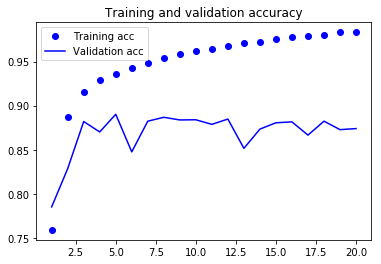

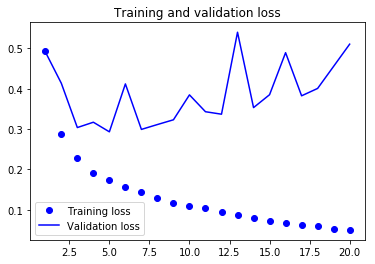

In [16]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()